In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def precision(y_true, pred):
    return (((pred==1)&(y_true==1)).sum())/(pred==1).sum()

def recall(y_true, pred):
    return (((pred==1)&(y_true==1)).sum())/(y_true==1).sum()

In [3]:
data=pd.read_csv("btcFULL.csv",sep=',')

In [4]:
# data=pd.read_csv("btcsmall1.csv")

In [5]:
data

,Unnamed: 0,timeframe,open,high,low,close,volume,kst,rsi,atr,cci,roc
0,0,2019-04-01 04:25:00,41.2293,41.2293,41.1893,41.1944,50.0,5.902878,62.186559,13.772895,96.985954,1.343226
1,1,2019-04-01 04:30:00,41.2193,41.2193,41.2193,41.2193,10.0,6.462614,63.592778,14.567688,86.188079,1.061383
2,2,2019-04-01 04:35:00,41.2118,41.2118,41.1852,41.1852,17.0,6.641268,60.286304,14.062853,69.625519,0.781336
3,3,2019-04-01 04:40:00,41.1500,41.1830,41.1471,41.1830,8.0,6.871251,60.069302,13.215507,48.580148,0.507627
4,4,2019-04-01 04:45:00,41.1859,41.2206,41.1859,41.2056,10.0,7.091090,61.598497,12.478685,55.049355,0.277917
...,...,...,...,...,...,...,...,...,...,...,...,...
195765,195765,2021-02-25 23:45:00,485.6661,488.3089,485.1261,488.1361,144.0,-13.691157,39.104378,16.014030,-178.925037,-1.803970
195766,195766,2021-02-25 23:50:00,488.0738,488.3847,486.9770,487.7701,136.0,-15.061980,38.535728,14.870171,-134.102163,-1.680147
195767,195767,2021-02-25 23:55:00,487.7701,491.1636,487.7700,489.6750,112.0,-15.503627,43.167944,13.808016,-83.156548,-1.431262
195768,195768,2021-02-26 00:00:00,489.6284,492.2937,488.1022,491.6993,194.0,-14.884513,47.680446,12.821729,-38.529380,-0.596543


In [6]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
data.loc[:, 'timeframe']=pd.to_datetime(data['timeframe'])

In [8]:
data.loc[:, 'timeframe']=pd.to_datetime(data['timeframe'])
data.loc[:, 'dayofweek']=data['timeframe'].apply(lambda x: x.dayofweek)
data.loc[:, 'hour']=data['timeframe'].apply(lambda x: x.hour)

In [9]:
data.loc[:, 'minute']=data['timeframe'].apply(lambda x: x.minute)

In [10]:
data

,timeframe,open,high,low,close,volume,kst,rsi,atr,cci,roc,dayofweek,hour,minute
0,2019-04-01 04:25:00,41.2293,41.2293,41.1893,41.1944,50.0,5.902878,62.186559,13.772895,96.985954,1.343226,0,4,25
1,2019-04-01 04:30:00,41.2193,41.2193,41.2193,41.2193,10.0,6.462614,63.592778,14.567688,86.188079,1.061383,0,4,30
2,2019-04-01 04:35:00,41.2118,41.2118,41.1852,41.1852,17.0,6.641268,60.286304,14.062853,69.625519,0.781336,0,4,35
3,2019-04-01 04:40:00,41.1500,41.1830,41.1471,41.1830,8.0,6.871251,60.069302,13.215507,48.580148,0.507627,0,4,40
4,2019-04-01 04:45:00,41.1859,41.2206,41.1859,41.2056,10.0,7.091090,61.598497,12.478685,55.049355,0.277917,0,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195765,2021-02-25 23:45:00,485.6661,488.3089,485.1261,488.1361,144.0,-13.691157,39.104378,16.014030,-178.925037,-1.803970,3,23,45
195766,2021-02-25 23:50:00,488.0738,488.3847,486.9770,487.7701,136.0,-15.061980,38.535728,14.870171,-134.102163,-1.680147,3,23,50
195767,2021-02-25 23:55:00,487.7701,491.1636,487.7700,489.6750,112.0,-15.503627,43.167944,13.808016,-83.156548,-1.431262,3,23,55
195768,2021-02-26 00:00:00,489.6284,492.2937,488.1022,491.6993,194.0,-14.884513,47.680446,12.821729,-38.529380,-0.596543,4,0,0


In [11]:
data.loc[:, 'buy']=pd.Series(np.zeros(len(data))).astype(int)

In [12]:
n=len(data)
for i in range(n-25):
    price=(data['close'][i])*1.03 #1.01*цена закрытия
    fall=(data['close'][i])*0.98
    switches=data['close'].iloc[i+1: i+25]#следующие 24 свечи
    increase=np.any(switches>price) and np.all(switches>fall)#цена закрытия у хотя бы одной из этих свеч 
                                                             #выше price и падение не больше, чем на 2%
    if (increase):
        data.loc[i, 'buy']=1#берем, если так
    

In [13]:
data

,timeframe,open,high,low,close,volume,kst,rsi,atr,cci,roc,dayofweek,hour,minute,buy
0,2019-04-01 04:25:00,41.2293,41.2293,41.1893,41.1944,50.0,5.902878,62.186559,13.772895,96.985954,1.343226,0,4,25,0
1,2019-04-01 04:30:00,41.2193,41.2193,41.2193,41.2193,10.0,6.462614,63.592778,14.567688,86.188079,1.061383,0,4,30,0
2,2019-04-01 04:35:00,41.2118,41.2118,41.1852,41.1852,17.0,6.641268,60.286304,14.062853,69.625519,0.781336,0,4,35,0
3,2019-04-01 04:40:00,41.1500,41.1830,41.1471,41.1830,8.0,6.871251,60.069302,13.215507,48.580148,0.507627,0,4,40,0
4,2019-04-01 04:45:00,41.1859,41.2206,41.1859,41.2056,10.0,7.091090,61.598497,12.478685,55.049355,0.277917,0,4,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195765,2021-02-25 23:45:00,485.6661,488.3089,485.1261,488.1361,144.0,-13.691157,39.104378,16.014030,-178.925037,-1.803970,3,23,45,0
195766,2021-02-25 23:50:00,488.0738,488.3847,486.9770,487.7701,136.0,-15.061980,38.535728,14.870171,-134.102163,-1.680147,3,23,50,0
195767,2021-02-25 23:55:00,487.7701,491.1636,487.7700,489.6750,112.0,-15.503627,43.167944,13.808016,-83.156548,-1.431262,3,23,55,0
195768,2021-02-26 00:00:00,489.6284,492.2937,488.1022,491.6993,194.0,-14.884513,47.680446,12.821729,-38.529380,-0.596543,4,0,0,0


In [14]:
deleted=data.iloc[n-25: n]

In [15]:
data.drop(index=range(n-25, n), inplace=True)

In [16]:
data.loc[:, 'buy']=data['buy'].astype(int)

In [17]:
data['buy'].value_counts()

0    191382
1      4363
Name: buy, dtype: int64

In [18]:
X=data.drop('buy',axis=1)
y=data['buy']

# Модели

## 3. sgd classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)

In [21]:
X_train

,timeframe,open,high,low,close,volume,kst,rsi,atr,cci,roc,dayofweek,hour,minute
191257,2021-02-10 08:05:00,460.5021,460.5030,459.0000,459.4050,26.0,-11.134474,40.858133,17.300737,-26.597053,-0.258123,2,8,5
53202,2019-10-06 04:25:00,81.2762,81.3201,81.2639,81.3089,1.0,-0.702140,43.327066,19.985347,-149.324231,-0.270455,6,4,25
41631,2019-08-27 00:05:00,102.6142,102.6872,102.5382,102.5476,1.0,-4.364888,41.787664,24.961328,-67.101400,-0.507709,1,0,5
113395,2020-05-05 17:00:00,89.1805,89.3519,89.1655,89.3063,85.0,4.983842,58.993346,28.439619,98.427643,0.596326,1,17,0
7312,2019-04-27 10:20:00,51.5075,51.5170,51.5020,51.5020,7.0,4.770282,45.483101,21.491241,-41.663900,-0.244054,5,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25631,2019-07-02 09:25:00,98.2355,98.7523,98.2355,98.7171,127.0,-30.713169,48.310853,50.887658,12.913679,0.406949,1,9,25
125680,2020-06-19 12:10:00,93.2678,93.4462,93.2632,93.3219,125.0,0.720374,67.226181,9.840278,160.788264,0.501095,4,12,10
42297,2019-08-29 07:35:00,95.9493,95.9660,95.7222,95.7249,0.0,-7.529918,39.444639,30.210776,-34.734179,-0.386487,3,7,35
34959,2019-08-03 19:50:00,108.2740,108.2740,108.0169,108.0169,2.0,0.310711,50.705132,25.162919,66.770588,0.415824,5,19,50


In [22]:
features=['open', 'high', 'low', 'close', 'volume', 'kst', 'rsi', 'atr', 'cci', 'roc']

## 1. KNN со standardscaler

In [23]:
ct=ColumnTransformer([('ohe', OneHotEncoder(), ['dayofweek', 'hour']), ('scale', StandardScaler(), features)])

In [56]:
pl_knn_ss=Pipeline([('ct',ct), ('fit', KNeighborsClassifier())])
pl_knn_ss.fit(X_new_train, y_new_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['dayofweek', 'hour']),
                                                 ('scale', StandardScaler(),
                                                  ['open', 'high', 'low',
                                                   'close', 'volume', 'kst',
                                                   'rsi', 'atr', 'cci',
                                                   'roc'])])),
                ('fit', KNeighborsClassifier())])

In [57]:
precision(y_new_train, pl_knn_ss.predict(X_new_train))

0.8953922789539228

In [37]:
search_knn_ss=GridSearchCV(pl_knn_ss, {'fit__n_neighbors': [5, 10]},  cv=5, scoring=make_scorer(precision_score),\
                          n_jobs=-1)
search_knn_ss.fit(X_train, y_train)

MemoryError: Unable to allocate 1.00 GiB for an array with shape (1071, 125276) and data type float64

## 2.KNN с minmax scaler

In [46]:
cat=pd.get_dummies(X_train.drop(['timeframe', 'minute'], axis=1), columns=['dayofweek', 'hour'])

In [47]:
mm_scale=MinMaxScaler()
mm_scale.fit(X_train[features])

MinMaxScaler()

In [48]:
cat.loc[:, features]=mm_scale.transform(X_train[features])

In [49]:
knn_mm1=KNeighborsClassifier()
knn_mm1.fit(cat, y_train)

KNeighborsClassifier()

In [34]:
pred=knn_mm1.predict(cat)

In [27]:
precision_score(y_train,pred)

0.7931526390870185

In [28]:
recall_score(y_train, pred)

0.15863052781740372

## Тест на новых данных (2 мес.)

In [127]:
def classification(gain, desc):
    new=pd.read_csv("btcFULL.csv",sep=',')#тут
    new.drop('Unnamed: 0', axis=1, inplace=True)
    new.loc[:, 'timeframe']=pd.to_datetime(new['timeframe'])
    new.loc[:, 'dayofweek']=new['timeframe'].apply(lambda x: x.dayofweek)
    new.loc[:, 'hour']=new['timeframe'].apply(lambda x: x.hour)
    new.loc[:, 'minute']=new['timeframe'].apply(lambda x: x.minute)
    new.loc[:, 'buy']=pd.Series(np.zeros(len(new))).astype(int)
    
    n=len(new)
    for i in range(n-25):
        price=(new['close'][i])*(1+gain/100) #1.03*цена закрытия
        fall=(new['close'][i])*(1-desc/100)
        switches=new['close'].iloc[i+1: i+25]#следующие 24 свечи
        increase=np.any(switches>price) and np.all(switches>=fall)#цена закрытия у хотя бы одной из этих свеч 
                                                             #выше price и падение не больше, чем на 1%
        if (increase):
            new.loc[i, 'buy']=1#берем, если так
            
    new.drop(index=range(n-25, n), inplace=True)
    new.loc[:, 'buy']=new['buy'].astype(int)
    new=new[new['timeframe'].apply(lambda x: (x.year==2021)|((x.year==2020)&(x.month==12)))]
    return new

In [128]:
new=classification(3, 1)

In [129]:
new['buy'].value_counts()

0    23842
1     1191
Name: buy, dtype: int64

In [130]:
ct_mm=ColumnTransformer([('ohe', OneHotEncoder(),['hour', 'dayofweek']),\
                        ('scale', MinMaxScaler(), features)])

In [131]:
pl_mm=Pipeline([('ct', ct_mm), ('knn', KNeighborsClassifier())])

In [132]:
X_new, y_new=new.drop('buy', axis=1), new['buy']

In [133]:
X_new_train, X_new_test, y_new_train, y_new_test=train_test_split(X_new, y_new, train_size=0.8, random_state=17)

In [134]:
pl_mm.fit(X_new_train, y_new_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['hour', 'dayofweek']),
                                                 ('scale', MinMaxScaler(),
                                                  ['open', 'high', 'low',
                                                   'close', 'volume', 'kst',
                                                   'rsi', 'atr', 'cci',
                                                   'roc'])])),
                ('knn', KNeighborsClassifier())])

In [135]:
new_pred=pl_mm.predict(X_new_train)

In [136]:
precision(y_new_train, new_pred), recall(y_new_train, new_pred)

(0.8803418803418803, 0.763771186440678)

In [137]:
precision_cv=cross_val_score(pl_mm, X_new_train, y_new_train, cv=5,scoring=make_scorer(precision_score))


In [138]:
recall_cv=cross_val_score(pl_mm, X_new_train, y_new_train, cv=5,scoring=make_scorer(recall_score))

In [139]:
np.mean(precision_cv), np.mean(recall_cv)

(0.7428458506090594, 0.5561690870201509)

Попробуем GridSearch

In [140]:
search_new=GridSearchCV(pl_mm, \
                        {'knn__n_neighbors': range(3, 20),'knn__weights':['uniform', 'distance'],'knn__p':[1,2]},\
                        scoring=make_scorer(precision_score), cv=5)
search_new.fit(X_new_train, y_new_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['hour',
                                                                          'dayofweek']),
                                                                        ('scale',
                                                                         MinMaxScaler(),
                                                                         ['open',
                                                                          'high',
                                                                          'low',
                                                                          'close',
                                                                          'volume',
           

In [141]:
search_new.best_params_

{'knn__n_neighbors': 19, 'knn__p': 1, 'knn__weights': 'distance'}

In [150]:
search_new.best_score_

0.896296654744372

In [142]:
pl_mm_best=search_new.best_estimator_

In [143]:
pred_best=pl_mm_best.predict(X_new_test)

In [144]:
precision(y_new_test, pred_best), recall(y_new_test, pred_best)##19 соседей

(0.8770491803278688, 0.4331983805668016)

## k=19, p=1, distance

In [145]:
pl_19=Pipeline([('ct', ct_mm), ('knn', KNeighborsClassifier(n_neighbors=19, p=1, weights='distance'))])
pl_19.fit(X_new_train, y_new_train)
pred_19=pl_19.predict(X_new_test)

In [146]:
precision(y_new_test, pred_19), recall(y_new_test, pred_19), f1_score(y_new_test, pred_19)#19 соседей

(0.8770491803278688, 0.4331983805668016, 0.5799457994579945)

## k=17, p=1, distance

In [147]:
pl_17=Pipeline([('ct', ct_mm), ('knn', KNeighborsClassifier(n_neighbors=17, p=1, weights='distance'))])
pl_17.fit(X_new_train, y_new_train)
pred_17=pl_17.predict(X_new_test)

In [148]:
precision(y_new_test, pred_17), recall(y_new_test, pred_17), f1_score(y_new_test, pred_17)#17 соседей

(0.8646616541353384, 0.46558704453441296, 0.6052631578947368)

## Смотрим на то, как расположены положительные свечи в самой выборке и в предсказании

In [156]:
def draw_switches(new):
    #288
    positives=[]
    for i in range(0,len(new)-288, 288):
        positives.append(new['buy'].iloc[i:i+288].sum())
    f,ax=plt.subplots(figsize=(13,10))
    ax.set_xticks(range(0,86,7))
    ax.set_yticks(range(0, 85, 3))
    ax.set_xlabel("Номер дня (данные с декабря по февраль)")
    ax.set_ylabel("Кол-во положительных свеч")
    plt.bar(np.arange(len(positives)), positives);

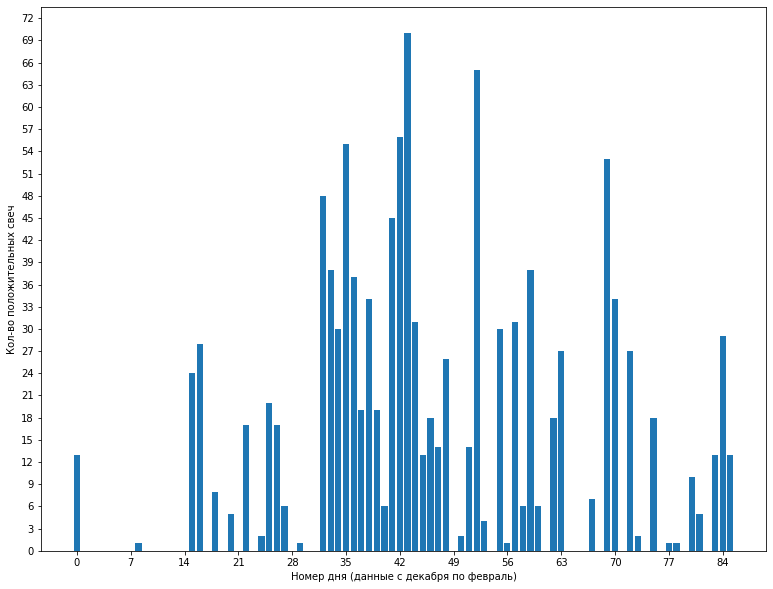

In [158]:
draw_switches(new)

Часто есть дни, когда положительных свеч не было вообще.
Уменьшим профит до 2.5%

In [153]:
profit2_5=classification(2.5, 1)

In [154]:
profit2_5['buy'].value_counts()

0    23187
1     1846
Name: buy, dtype: int64

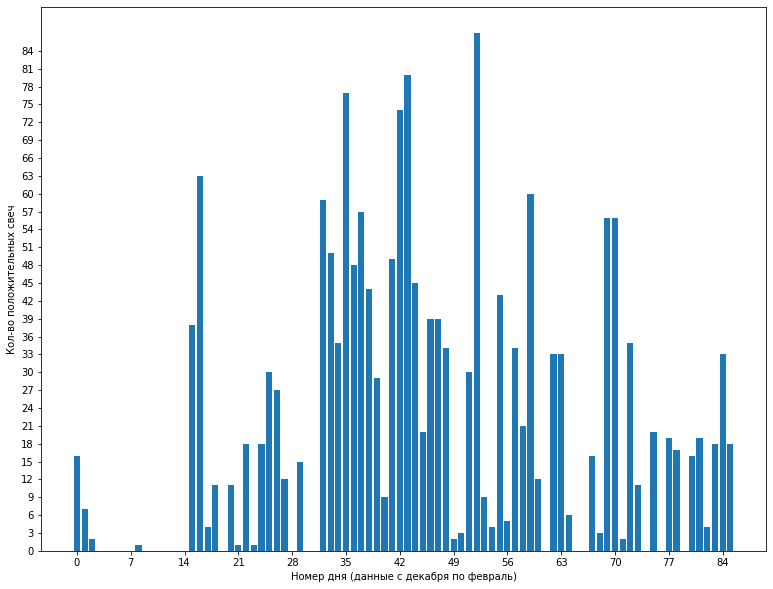

In [159]:
draw_switches(profit2_5)

In [160]:
profit_2=classification(2, 1)

In [161]:
profit_2['buy'].value_counts()

0    22099
1     2934
Name: buy, dtype: int64

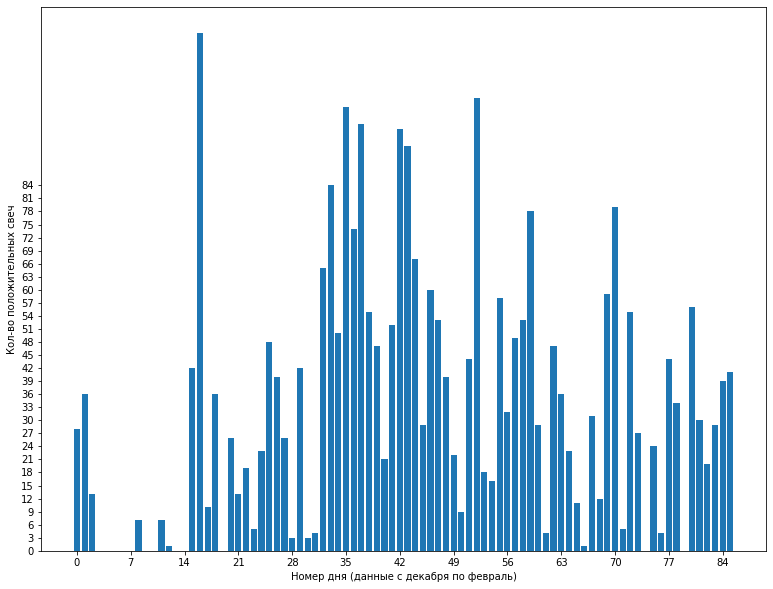

In [162]:
draw_switches(profit_2)

In [163]:
profit_23=classification(2.3, 1)

In [166]:
profit_23['buy'].value_counts()

0    22805
1     2228
Name: buy, dtype: int64

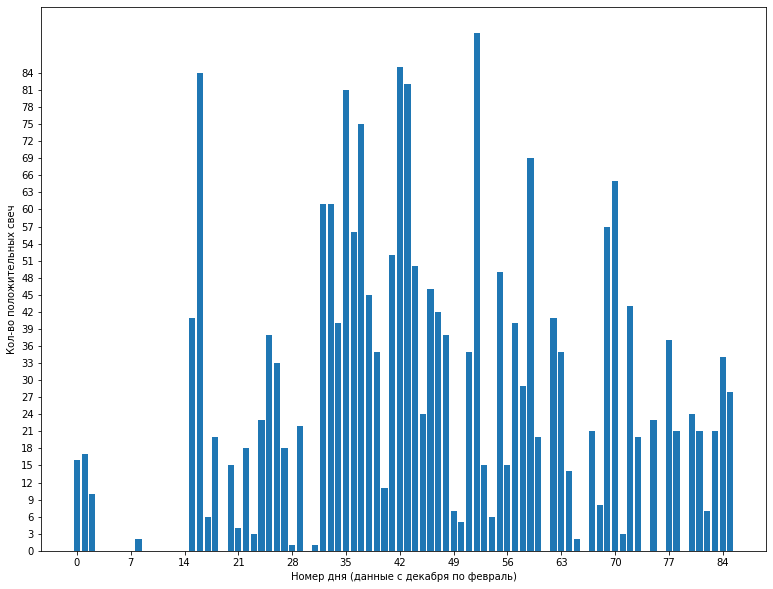

In [165]:
draw_switches_switches(profit_23)

## Обучение на данных с 2.5% профитом

In [167]:
profit2_5=classification(2.5, 1)

In [168]:
X_train, X_test, y_train, y_test=train_test_split_test_split(profit2_5.drop('buy', axis=1), profit2_5['buy'], train_size=0.8)

In [170]:
pl_mm.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['hour', 'dayofweek']),
                                                 ('scale', MinMaxScaler(),
                                                  ['open', 'high', 'low',
                                                   'close', 'volume', 'kst',
                                                   'rsi', 'atr', 'cci',
                                                   'roc'])])),
                ('knn', KNeighborsClassifier())])

In [171]:
pred2_5=pl_mm.predict(X_test)
precision(y_test, pred2_5), recall(y_test, pred2_5), f1_score(y_test, pred2_5)

(0.7689969604863222, 0.67828418230563, 0.7207977207977208)

In [172]:
search2_5=GridSearchCV(pl_mm, \
                        {'knn__n_neighbors': range(3, 20),'knn__weights':['uniform', 'distance'],'knn__p':[1,2]},\
                        scoring=make_scorer(precision_score), cv=5)
search2_5.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(),
                                                                         ['hour',
                                                                          'dayofweek']),
                                                                        ('scale',
                                                                         MinMaxScaler(),
                                                                         ['open',
                                                                          'high',
                                                                          'low',
                                                                          'close',
                                                                          'volume',
           

In [175]:
search2_5.best_params_, search2_5.best_score_

({'knn__n_neighbors': 19, 'knn__p': 1, 'knn__weights': 'distance'},
 0.8881853280276374)

In [176]:
best_pred2_5=search2_5.best_estimator_.predict(X_test)

In [177]:
precision(y_test, best_pred2_5), recall(y_test, best_pred2_5), f1_score(y_test, best_pred2_5)

(0.8968609865470852, 0.5361930294906166, 0.6711409395973155)

In [178]:
best_pl2_5=search2_5.best_estimator_

In [197]:
%%time
all2_5_pred=best_pl2_5.predict(profit2_5.drop('buy', axis=1))

CPU times: user 44.3 s, sys: 3.07 s, total: 47.4 s
Wall time: 18.3 s


In [194]:
all2_5=profit2_5['buy']

In [191]:
current=all2_5.iloc[0]
groups=[]
k=0
for i in np.array(all2_5):
    if i==current:
        k+=1
    else:
        groups.append((current, k))
        k=1
        current=i
    groups.append((current, k))

In [217]:
current=all2_5.iloc[0]
groups=[]
begin=0
for i in range(len(all2_5)):
    if all2_5[i]!=current:
        groups.append((current, begin, i-1))
        current, begin=all2_5[i], i
groups.append((current, begin, i))

KeyError: 0

In [193]:
groups

[(0, 195),
 (1, 16),
 (0, 168),
 (1, 1),
 (0, 17),
 (1, 1),
 (0, 4),
 (1, 1),
 (0, 2),
 (1, 3),
 (0, 5),
 (1, 1),
 (0, 283),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 1743),
 (1, 1),
 (0, 2053),
 (1, 26),
 (0, 2),
 (1, 1),
 (0, 71),
 (1, 20),
 (0, 33),
 (1, 8),
 (0, 61),
 (1, 25),
 (0, 39),
 (1, 11),
 (0, 1),
 (1, 2),
 (0, 30),
 (1, 5),
 (0, 31),
 (1, 3),
 (0, 35),
 (1, 1),
 (0, 35),
 (1, 3),
 (0, 454),
 (1, 8),
 (0, 6),
 (1, 3),
 (0, 532),
 (1, 2),
 (0, 1),
 (1, 2),
 (0, 1),
 (1, 7),
 (0, 258),
 (1, 1),
 (0, 291),
 (1, 18),
 (0, 117),
 (1, 1),
 (0, 421),
 (1, 2),
 (0, 1),
 (1, 13),
 (0, 1),
 (1, 1),
 (0, 1),
 (1, 2),
 (0, 315),
 (1, 1),
 (0, 1),
 (1, 1),
 (0, 1),
 (1, 4),
 (0, 1),
 (1, 2),
 (0, 1),
 (1, 1),
 (0, 49),
 (1, 1),
 (0, 2),
 (1, 20),
 (0, 91),
 (1, 22),
 (0, 43),
 (1, 1),
 (0, 30),
 (1, 4),
 (0, 105),
 (1, 1),
 (0, 29),
 (1, 7),
 (0, 134),
 (1, 2),
 (0, 4),
 (1, 2),
 (0, 410),
 (1, 8),
 (0, 1),
 (1, 4),
 (0, 64),
 (1, 1),
 (0, 148),
 (1, 2),
 (0, 783),
 (1, 32),
 (0, 1),
 (1, 1),
 (0

## Обучение на данных с 2% профитом

In [ ]:
profit2=classification(2, 1)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split_test_split(profit2.drop('buy', axis=1), profit2['buy'], train_size=0.8)

In [ ]:
pl_mm.fit(X_train, y_train)

In [ ]:
pred2=pl_mm.predict(X_test)
precision(y_test, pred2), recall(y_test, pred2), f1_score(y_test, pred2)

In [ ]:
search2=GridSearchCV(pl_mm, \
                        {'knn__n_neighbors': range(3, 20),'knn__weights':['uniform', 'distance'],'knn__p':[1,2]},\
                        scoring=make_scorer(precision_score), cv=5)
search2.fit(X_train, y_train)

In [ ]:
search2.best_params_, search2.best_score_

In [ ]:
best_pred2=search2.best_estimator_.predict(X_test)

In [ ]:
precision(y_test, best_pred2), recall(y_test, best_pred2), f1_score(y_test, best_pred2)

## Обучение на данных с 2.3% профитом

In [ ]:
profit23=classification(2.3, 1)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split_test_split(profit23.drop('buy', axis=1), profit23['buy'], train_size=0.8)

In [ ]:
pl_mm.fit(X_train, y_train)

In [ ]:
pred23=pl_mm.predict(X_test)
precision(y_test, pred23), recall(y_test, pred23), f1_score(y_test, pred23)

In [ ]:
search23=GridSearchCV(pl_mm, \
                        {'knn__n_neighbors': range(3, 20),'knn__weights':['uniform', 'distance'],'knn__p':[1,2]},\
                        scoring=make_scorer(precision_score), cv=5)
search23.fit(X_train, y_train)

In [ ]:
search23.best_params_, search23.best_score_

In [ ]:
best_pred23=search23.best_estimator_.predict(X_test)

In [ ]:
precision(y_test, best_pred23), recall(y_test, best_pred23), f1_score(y_test, best_pred23)

In [111]:
predd=pl_17.predict(a_x_test)

In [112]:
precision(a_y_test, predd), recall(a_y_test, predd), f1_score(a_y_test, predd)#17 соседей

(0.8287671232876712, 0.4898785425101215, 0.6157760814249363)

In [108]:
#288
positives=[]
for i in range(0,len(a)-288, 288):
    positives.append(a['buy'].iloc[i:i+288].sum())

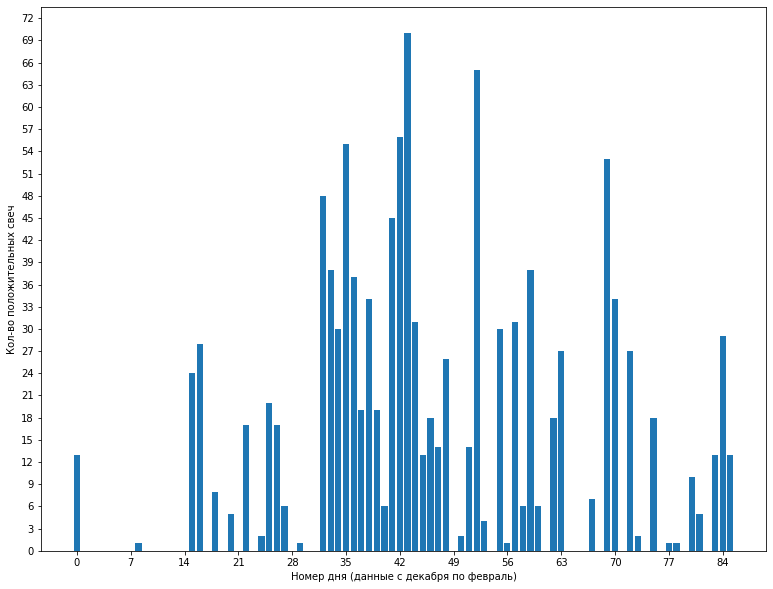

In [109]:
f,ax=plt.subplots(figsize=(13,10))
ax.set_xticks(range(0,86,7))
ax.set_yticks(range(0, 85, 3))
ax.set_xlabel("Номер дня (данные с декабря по февраль)")
ax.set_ylabel("Кол-во положительных свеч")
plt.bar(np.arange(len(positives)), positives);

Возьмем модель с 17-ю соседями:

In [63]:
current=y_new.iloc[0]
groups=[]
k=0
for i in np.array(y_new):
    if i==current:
        k+=1
    else:
        groups.append((current, k))
        k=1
        current=i
        
    
    

In [65]:
groups=np.array(groups)

In [66]:
groups

array([[   0,  192],
       [   1,   15],
       [   0,    3],
       [   1,    1],
       [   0, 2232],
       [   1,    1],
       [   0, 2055],
       [   1,    2],
       [   0,    1],
       [   1,   20],
       [   0,   78],
       [   1,    2],
       [   0,   11],
       [   1,    1],
       [   0,  106],
       [   1,    1],
       [   0,    2],
       [   1,    3],
       [   0,    1],
       [   1,   17],
       [   0,    5],
       [   1,    1],
       [   0,   34],
       [   1,    1],
       [   0,    5],
       [   1,    1],
       [   0,   37],
       [   1,    3],
       [   0,   33],
       [   1,    1],
       [   0,  529],
       [   1,    8],
       [   0,  541],
       [   1,    1],
       [   0,    5],
       [   1,    4],
       [   0,  553],
       [   1,   17],
       [   0,  540],
       [   1,    1],
       [   0,    8],
       [   1,    1],
       [   0,  332],
       [   1,    2],
       [   0,   57],
       [   1,   18],
       [   0,   99],
       [   1,

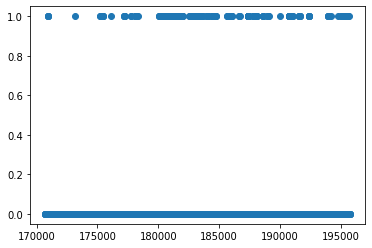

In [51]:
plt.scatter(x=y_new_test.index, y=y_new_test);


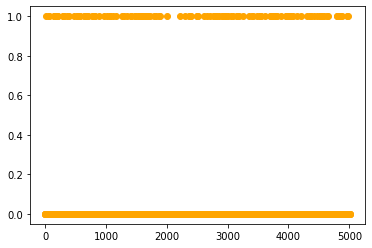

In [52]:
plt.scatter(range(len(predic)), predic, c='orange')

In [78]:
search_knn=GridSearchCV(KNeighborsClassifier(),{'n_neighbors': range(3, 12, 2), 'weights': ['uniform', 'distance']\
                                                ,'metric': ['manhattan', 'euclidean']}, cv=5,\
                        scoring=make_scorer(precision_score), n_jobs=-1)
search_knn.fit(cat, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean'],
                         'n_neighbors': range(3, 12, 2),
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(precision_score))

In [80]:
search.best_score_

0.5915220135973283

In [81]:
pred_search=search_knn.best_estimator_.predict(cat)

In [82]:
precision_score(y_train, pred_search)

1.0

In [45]:
pipeline_mm=Pipeline([('minmax_scaler', MinMaxScaler()), ('fit', KNeighborsClassifier())])
pipeline_mm.fit(X_train[features+['dayofweek', 'hour']], y_train)

Pipeline(steps=[('minmax_scaler', MinMaxScaler()),
                ('fit', KNeighborsClassifier())])

In [53]:
predic=pipeline_mm.predict(X_train[features+['dayofweek', 'hour']])

In [46]:
recall_score(y_train, predic)

0.6778887303851641

In [47]:
precision_score(y_train, predic)

0.8962655601659751

In [55]:
test_pred=pipeline_mm.predict(X_test[features+['dayofweek', 'hour']])

In [57]:
recall_score(y_test, test_pred)

0.5011655011655012

In [81]:
cross_val_score(pipeline_mm, X_train[features], y_train, cv=5, scoring=make_scorer(f1_score))

array([0.20330969, 0.21162791, 0.19787986, 0.2265896 , 0.19744483])

In [35]:
ct_knn=ColumnTransformer([('ohe', OneHotEncoder(), ['hour', 'dayofweek']), ('scaler', MinMaxScaler(), features)])
pipeline_knn_mm=Pipeline([('trans', ct_knn), ('fit', KNeighborsClassifier())])
pipeline_knn_mm.fit(X_train, y_train)
precision_score(y_train, pipeline_knn_mm.predict(X_train))

KeyboardInterrupt: 

При количестве соседей, равном 8-ми, выдал чуть более худший результат, чем при 7-ми соседях. Остановимся на последнем значении (большое значение этого параметра может привести к переобучению)

In [27]:
searcher=GridSearchCV(KNeighborsClassifier(), {'n_neighbors': range(5, 20, 3), 'weights':\
                                              ['uniform', 'distance'], \
                                               'metric': ['minkowski', 'manhattan', 'euclidean']}, cv=5,n_jobs=-1)

In [256]:
# searcher.fit(scaler.fit_transform(X_train[features]), y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(5, 20, 3),
                         'weights': ['uniform', 'distance']})

In [260]:
# accuracy_score(y_test, searcher.best_estimator_.predict(scaler.transform(X_test[features])))

0.8524611101177553

In [29]:
ct=ColumnTransformer([('ohe', OneHotEncoder(), ['hour', 'minute', 'dayofweek']), \
                      ('scale', MinMaxScaler(), features)])
pipeline_mm2=Pipeline([('transform', ct), ('fit', KNeighborsClassifier())])

In [30]:
pipeline_mm2.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['hour', 'minute',
                                                   'dayofweek']),
                                                 ('scale', MinMaxScaler(),
                                                  ['open', 'high', 'low',
                                                   'close', 'volume', 'kst',
                                                   'rsi', 'atr', 'cci',
                                                   'roc'])])),
                ('fit', KNeighborsClassifier())])

In [78]:
precision_recall_fscore_support(y_train, pipeline_mm2.predict(X_train))

KeyboardInterrupt: 

# Разведочный анализ.


Построим графики количества "хороших" свечей в зависимости от их часа, минуты и дня недели

/home/maxim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/maxim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/maxim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


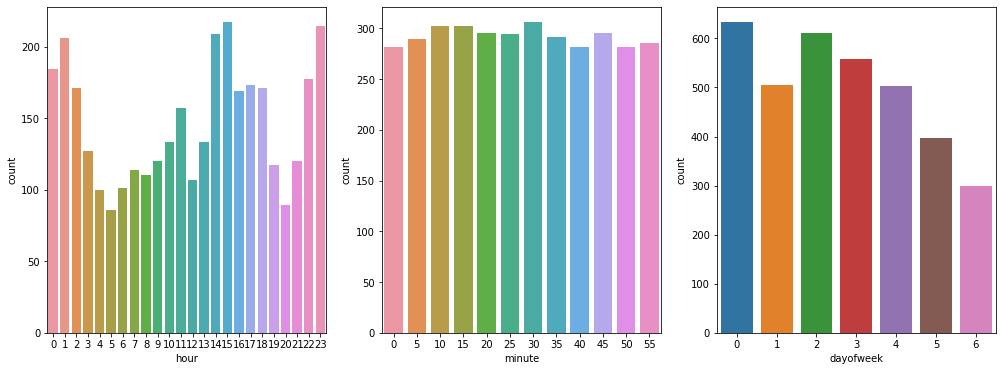

In [47]:
f, ax=plt.subplots(1, 3, figsize=(17,6))
time=['hour', 'minute', 'dayofweek']
for i in range(3):
    sns.countplot(X_train[y_train==1][time[i]], ax=ax[i])

Видим, что это количество отличается в зависимости от часа и дня недели. Количество хороших свечей примерно одинаковое в каждую из 5-минуток

/home/maxim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/maxim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/maxim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


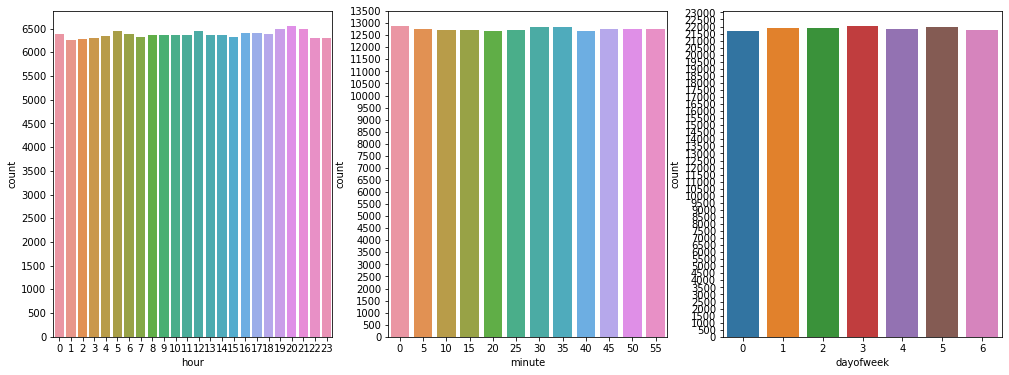

In [55]:
f, ax=plt.subplots(1, 3, figsize=(17,6))
time=['hour', 'minute', 'dayofweek']
for i in range(3):
    ax[i].set_yticks(range(0, 30000, 500))
    sns.countplot(X_train[y_train==0][time[i]], ax=ax[i])

In [32]:
X_train.columns

Index(['timeframe', 'open', 'high', 'low', 'close', 'volume', 'kst', 'rsi',
       'atr', 'cci', 'roc', 'dayofweek', 'hour', 'minute'],
      dtype='object')

/home/maxim/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kst', ylabel='rsi'>

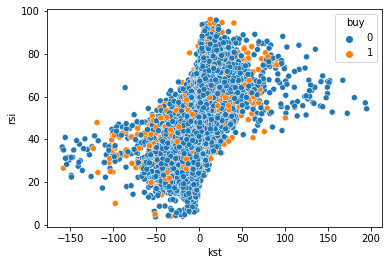

In [40]:
sns.scatterplot(X_train['kst'], X_train['rsi'],hue=y_train)

In [33]:
indicators=['kst', 'rsi','atr', 'cci', 'roc']

In [89]:
knnnn=KNeighborsClassifier(metric='manhattan')
knnnn.fit(X_train.loc[:, ['kst','roc','cci']], y_train)

KNeighborsClassifier(metric='manhattan')

In [90]:
precision_score(y_train, knnnn.predict(X_train.loc[:, ['kst','roc','cci']]))

0.6634615384615384

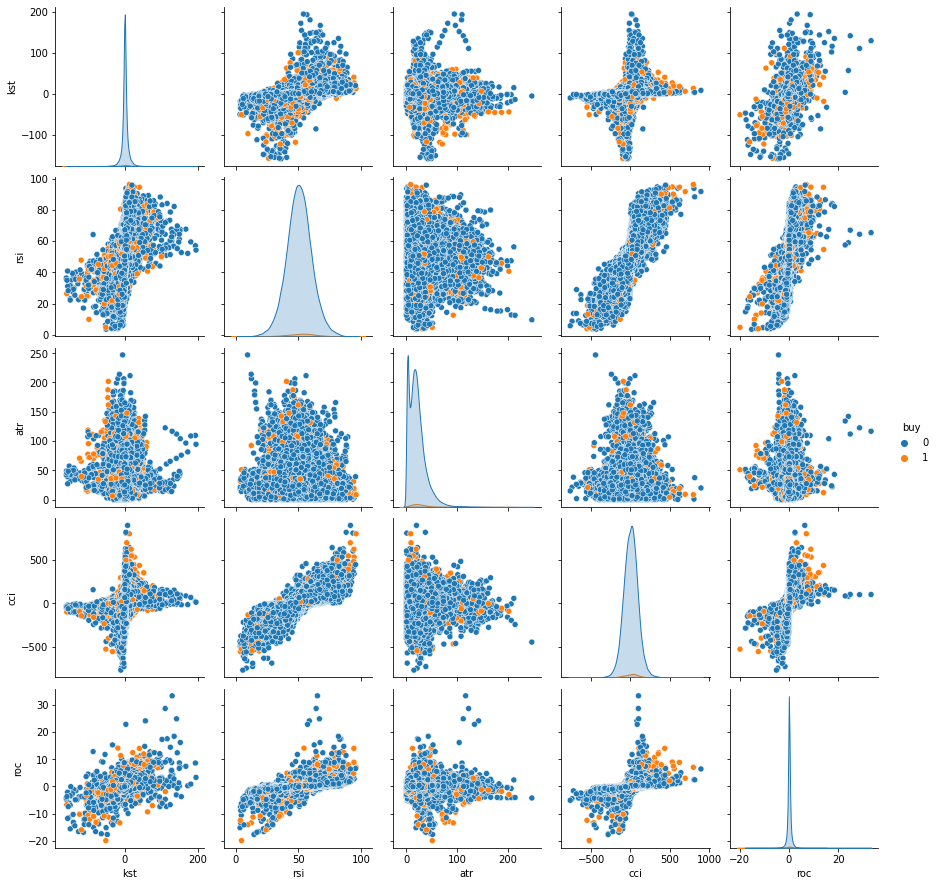

In [52]:
sns.pairplot(pd.concat([X_train[indicators], y_train], axis=1), hue="buy")

## 4. Деревья решений

In [24]:
data_tree=pd.get_dummies(X_train.drop(['timeframe', 'minute'], axis=1), columns=['dayofweek', 'hour'])

In [26]:
tree=DecisionTreeClassifier()
tree.fit(data_tree, y_train)

DecisionTreeClassifier()

In [39]:
cross_val_score(tree, data_tree,y_train, scoring=make_scorer(precision_score))

array([0.54876274, 0.47966339, 0.48405797, 0.44740346, 0.48847262])

In [41]:
np.mean(np.array([0.54876274, 0.47966339, 0.48405797, 0.44740346, 0.48847262]))

0.4896720360000001

In [48]:
recall_score(y_train, tree_pred)

1.0

In [60]:
search=GridSearchCV(tree, param_grid={'max_depth':range(3, 20, 2)},scoring=make_scorer(precision_score),cv=5,n_jobs=-1)
search.fit(data_tree, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 20, 2)},
             scoring=make_scorer(precision_score))

In [71]:
search.best_score_

0.5915220135973283

In [64]:
precision_score(y_train, search.best_estimator_.predict(data_tree))

0.9660912453760789

In [61]:
precision_recall_fscore_support(y_train,  search.best_estimator_.predict(data_tree))

(array([0.98749468, 0.96609125]),
 array([0.99964074, 0.44707561]),
 array([0.99353059, 0.61127365]),
 array([153091,   3505], dtype=int64))

Видно, что модель неустойчива: лучшая оценка на кросс-валидации сильно отличается от "прямой" оценки точности (0.59 vs 0.96)

In [72]:
precision_score(y_test, search.best_estimator_.predict(pd.get_dummies(X_test.drop(['timeframe', 'minute'], axis=1), columns=['dayofweek', 'hour'])))

0.5839793281653747

In [42]:
data_tree1=pd.get_dummies(X_train.drop(['timeframe', 'minute'], axis=1), columns=['hour'])

In [43]:
tree1=DecisionTreeClassifier()
tree1.fit(data_tree1, y_train)

DecisionTreeClassifier()

In [44]:
cross_val_score(tree1, data_tree1,y_train, scoring=make_scorer(precision_score))

array([0.48082192, 0.46251768, 0.44733045, 0.44297082, 0.48044693])

In [46]:
tree1.get_depth()

38

## 5. Случайный лес

In [57]:
rf=RandomForestClassifier()
rf.fit(X_train[main_feat], y_train)

RandomForestClassifier()

In [58]:
cross_val_score(rf, X_train[main_feat], y_train, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)

array([0.20766773, 0.20611916, 0.21086262, 0.15660685, 0.180937  ])

## 6. Логистическая регрессия

In [69]:
from sklearn.linear_model import LogisticRegression

In [73]:
ct_lr=ColumnTransformer([('scale', StandardScaler(), main_feat)])

In [77]:
lr=LogisticRegression(class_weight='balanced')
pl_lr=Pipeline([('transform', ct_lr), ('fit', LogisticRegression())])

In [78]:
pl_lr.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  ['open', 'high', 'low',
                                                   'close', 'volume', 'kst',
                                                   'rsi', 'atr', 'cci', 'roc',
                                                   'kst', 'rsi', 'atr', 'cci',
                                                   'roc'])])),
                ('fit', LogisticRegression())])

In [79]:
cross_val_score(pl_lr, X_train, y_train, cv=5, n_jobs=-1, scoring=make_scorer(f1_score))

array([0.02782609, 0.00706714, 0.02447552, 0.02116402, 0.04490501])

## Кластеризация

In [114]:
from sklearn.cluster import KMeans

In [116]:
kmeans=KMeans()
kmeans.fit(X_train[main_feat])

KMeans()

In [132]:
clusters=kmeans.predict(X_train[main_feat])

In [152]:
clusters

array([5, 1, 1, ..., 5, 2, 2], dtype=int32)

In [153]:
X_train.loc[:,'cluster']=pd.Series(clusters).astype(int)

In [162]:
new=pd.concat([X_train, pd.Series(clusters, name='cluster')], axis=1)